# On SymPy
- [SymPy](https://www.sympy.org/en/index.html)
- [SymPy Tutorial - TM Quest (YouTube)](https://youtube.com/playlist?list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T)

In [1]:
import sympy as sp

## Basics

In [2]:
x, t = sp.symbols("x, t")
e1 = x * t**2 - x
e1

t**2*x - x

In [3]:
e1.factor()

x*(t - 1)*(t + 1)

In [4]:
e1.diff(x)

t**2 - 1

In [5]:
Phi1, alpha1 = sp.symbols("\Phi_1, \\alpha_1")
Phi1

\Phi_1

In [6]:
alpha1

\alpha_1

In [7]:
sp.sin(Phi1).diff(Phi1) * sp.tan(alpha1)

cos(\Phi_1)*tan(\alpha_1)

In [8]:
theta = sp.symbols("\Theta_0:3")
sp.Matrix(theta)

Matrix([
[\Theta_0],
[\Theta_1],
[\Theta_2]])

In [9]:
sp.oo

oo

In [10]:
sp.I

I

In [11]:
t, x, l = sp.symbols("t, x, l")

In [12]:
e2 = sp.Eq(x, l*sp.sin(t))
e2

Eq(x, l*sin(t))

In [13]:
sp.solve(e2, t)

[pi - asin(x/l), asin(x/l)]

In [14]:
sp.solveset(e2, t)

ConditionSet(t, Eq(sin(t) - x/l, 0), Reals)

In [15]:
sp.diff(e1, t)

2*t*x

## Example (Free fall)
- [Free fall - Wikipedia](https://en.wikipedia.org/wiki/Free_fall)

$$ v(t) = \frac{d}{dt} y(t) $$
$$ a(t) = \frac{d}{dt} v(t) = \frac{d^2}{dt^2} y(t) $$

In [16]:
a, y = sp.symbols('a, y')
y = sp.Function(y)(t)
y

y(t)

In [17]:
ff = sp.Eq(a, sp.diff(y, t, 2))
ff

Eq(a, Derivative(y(t), (t, 2)))

In [18]:
ff_sol = sp.dsolve(ff, y)
ff_sol

Eq(y(t), C1 + C2*t + a*t**2/2)

In [19]:
ff_sol.free_symbols

{C1, C2, a, t}

In [20]:
ff_sol_sub = ff_sol.subs({"C1": 0, "C2": 0, a: 9.81})
ff_sol_sub

Eq(y(t), 4.905*t**2)

In [21]:
ff_lam = sp.lambdify(t, ff_sol_sub.rhs)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
tff = np.arange(0, 3.1, 0.1)
tff

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. ])

In [24]:
yff = ff_lam(t=tff)

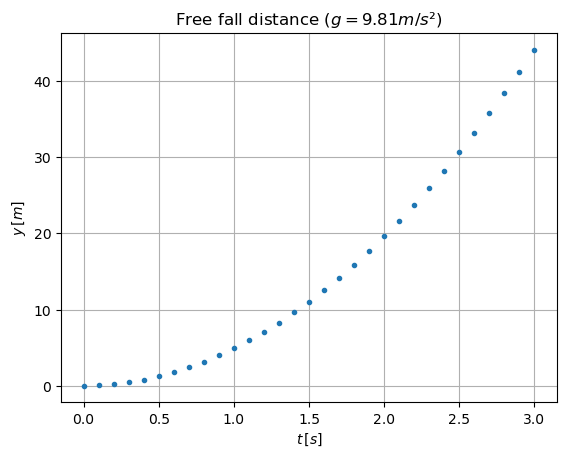

In [25]:
plt.plot(tff, yff, '.')
plt.grid()
plt.title("Free fall distance ($g=9.81 m/s²$)")
plt.xlabel("$t \, [s]$")
plt.ylabel("$y \, [m]$");